In [3]:
import numpy as np
from scipy import interpolate, optimize, stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.constants import pi, hbar, e, m_e, k
import pandas as pd
import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
plt.rcParams['figure.figsize'] = [10, 7.5]

# Simulation results for planar system with collisions with $N_2$

In [5]:
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, avg_mob, avg_speed
# cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, avg_mob, avg_speed, (ramo_current(i), i = 1, nrSpecies)

#filename_ramo_no = './Test_2/out/ramo_current.dt'
#df_ramo_no = pd.read_csv(filepath_or_buffer=filename_ramo_no, index_col=False, delim_whitespace=True, \
#                   header=None, names=['time', 'step', 'current', 'Volt', 'nrPart', 'nrElec', 'nrHole', 'mobility', 'speed'])

filename_ramo_coll = './out/ramo_current.dt'
df_ramo_coll = pd.read_csv(filepath_or_buffer=filename_ramo_coll, index_col=False, delim_whitespace=True, \
                   header=None, names=['time', 'step', 'current', 'Volt', 'nrPart', 'nrElec', 'nrHole', 'mobility', 'speed', 'ramo_elec', 'ramo_ion'])

#filename_ramo_hole = './Test_Holes/out/ramo_current.dt'
#df_ramo_hole = pd.read_csv(filepath_or_buffer=filename_ramo_hole, index_col=False, delim_whitespace=True, \
#                   header=None, names=['time', 'step', 'current', 'Volt', 'nrPart', 'nrElec', 'nrHole', 'mobility', 'speed', 'ramo_elec', 'ramo_ion'])

# Ramo current

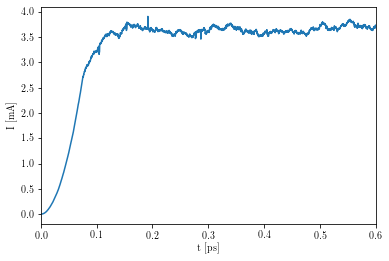

In [6]:
#plt.plot(df_ramo_no['time'], df_ramo_no['current']/1.0E-3, df_ramo_coll['time'], df_ramo_coll['current']/1.0E-3, df_ramo_hole['time'], df_ramo_hole['current']/1.0E-3)
plt.plot(df_ramo_coll['time'], df_ramo_coll['current']/1.0E-3)
plt.xlabel('t [ps]')
plt.ylabel('I [mA]')
#plt.legend(['No-Collisions', 'With Collisions', 'With Collisions and Ions'])
plt.xlim([0.0 , 0.6])
plt.show()

The graph above shows the ramo current in the system. The current with collisions is only slight higher then without collisions.

# Number of electrons

In [7]:
#cur_time, step, nrElecEmitAll, nrElec, (nrEmitted_emitters(i), i = 1, nrEmit)
#filename_emit_no = './Test_2/out/emitted.dt'
#df_emit_no = pd.read_csv(filepath_or_buffer=filename_emit_no, index_col=False, delim_whitespace=True, \
#                   header=None, names=['time', 'step', 'emit', 'nrElec'])

#cur_time, step, posInit, nrEmitted, nrElec, nrAbsorbed_b, nrElecEmit99
filename_emit_coll = './out/emitted.dt'
df_emit_coll = pd.read_csv(filepath_or_buffer=filename_emit_coll, index_col=False, delim_whitespace=True, \
                   header=None, names=['time', 'step', 'emit', 'nrElec'])

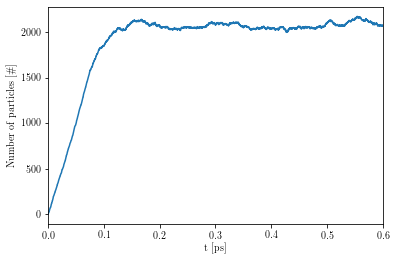

In [8]:
#plt.plot(df_emit_no['time'], df_emit_no['nrElec'], df_emit_coll['time'], df_emit_coll['nrElec'], df_ramo_hole['time'], df_ramo_hole['nrElec'], df_ramo_hole['time'], df_ramo_hole['nrHole'])
#plt.legend(['No-Collisions (Electrons)', 'With Collisions (Electrons)', 'With Ions (Electrons)', 'With Ions (Ions)'])
plt.plot(df_emit_coll['time'], df_emit_coll['nrElec'])
plt.xlabel('t [ps]')
plt.ylabel('Number of particles [\#]')
plt.xlim([0.0, 0.6])
plt.show()

The graph above shows the number of electrons in the system. We have a lot more electrons in the system when we have collisions.
This is probably due to energy loss and the fact that they scatter around.

# Velocity

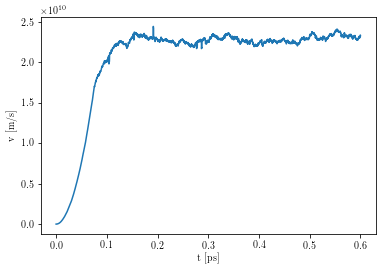

In [9]:
#plt.plot(df_ramo_no['time'], df_ramo_no['speed'], df_ramo_coll['time'], df_ramo_coll['speed'], df_ramo_hole['time'], df_ramo_hole['speed'])
plt.plot(df_ramo_coll['time'], df_ramo_coll['speed'])
plt.xlabel('t [ps]')
plt.ylabel('v [m/s]')
#plt.legend(['No-Collisions', 'With Collisions', 'With Ions'])
plt.show()

The average velocity is lower in the case with collisions. This is probably due to energy loss and coulomb effects. This explains why the ramo current is about the same with and without collisions even though the number of electrons is higher.

# Mobility

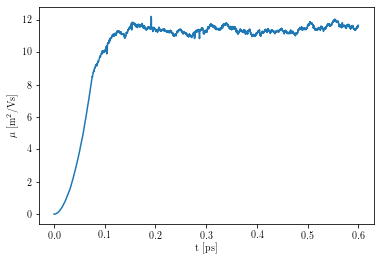

In [10]:
#plt.plot(df_ramo_no['time'], df_ramo_no['mobility'], df_ramo_coll['time'], df_ramo_coll['mobility'], df_ramo_hole['time'], df_ramo_hole['mobility'])
plt.plot(df_ramo_coll['time'], df_ramo_coll['mobility'])
plt.xlabel('t [ps]')
plt.ylabel('$\mu$ [m$^2$/Vs]')
#plt.legend(['No-Collisions', 'With Collisions'])
plt.show()

The graph shows the average mobility calculated for the electrons at each time step. The current speed of the electron is used along with the total field acting on it, $\mu = v/E$. It can be seen from the graph that mobility is lower with collisions as should be expected. This is about a factor of 2 which is in line with the change in the average velocity.
#### Todo: $\mu = \frac{v_d}{E}$. Here the total $E$ field was used. But should it only be the field due to the diode and not the space charge? The total field enters this indirectly through the velocity.

# Collisions

In [11]:
filename_coll = './out/collisions.dt'
df_nr_coll = pd.read_csv(filepath_or_buffer=filename_coll, index_col=False, delim_whitespace=True, \
                   header=None, names=['step', 'time', 'nrColl', 'nrIon', 'count_n', 'mean_path', 'mean_actual_avg'],
                        na_values='NaN')
#step, cur_time, nrColl, nrIon, count_n,  (mean_path_avg/length_scale), (mean_actual_avg/length_scale)

In [12]:
# normal temperature and pressure (NTP)
P = 101325.0 # Pa
T = 293.15 # K

# System
time_step = (1.0E-4)*1.0E-12
#N_2 = 2200
n_1 = P/(k*T)
CTV_max = 5.433415606647856e-13
CTV_mean = 2.538764385560707e-13

# Max number of collisions
df_nr_coll['expColl'] = 1.0*time_step*n_1*df_emit_coll['nrElec']*CTV_max
df_nr_coll['expmeanColl'] = 1.0*time_step*n_1*df_emit_coll['nrElec']*CTV_mean

df_nr_coll['roll'] = df_nr_coll['nrColl'].rolling(500).mean()
df_nr_coll['rollIon'] = df_nr_coll['nrIon'].rolling(500).mean()

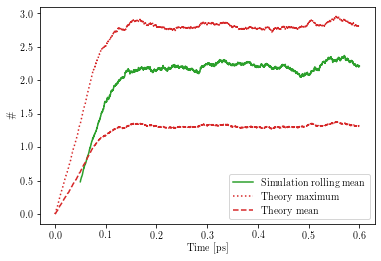

In [13]:
plt.plot(#df_nr_coll['time'], df_nr_coll['nrColl'], 'C0-', \
         #df_nr_coll['time'], df_nr_coll['nrIon'], 'C1-',\
         df_nr_coll['time'], df_nr_coll['roll'], 'C2-',\
         #df_nr_coll['time'], df_nr_coll['rollIon'], 'C2-',\
         df_nr_coll['time'], df_nr_coll['expColl'], 'C3:', \
         df_nr_coll['time'], df_nr_coll['expmeanColl'], 'C3--')
plt.xlabel('Time [ps]')
plt.ylabel('\#')
#plt.legend(['Simulation collisions', 'Simulation ionizations', 'Simulation rolling mean', 'Theory maximum', 'Theory mean'])
#plt.legend(['Simulation rolling mean', 'Simulation rolling mean Ioniaztion', 'Theory maximum', 'Theory mean'])
plt.legend(['Simulation rolling mean', 'Theory maximum', 'Theory mean'])
plt.show()

The green line shows the rolling mean number of collisions taken over 500 time steps. The two red lines show a theoretical number of collisions. If the cross section is $\sigma$ and the particle has the velocity $v$ then during one time step $\Delta t$ it will carve out a volume
$$\mathrm{V} = v\Delta t\sigma\, .$$
If we multiply this number with density, $n_{N_2}$ of $N_2$ in the system then we have an estimate how many nitrogen molecules that electron will hit in one time step
$$v\Delta t\sigma n_{N_2}$$
This is for one electron, to obtain the total number of collisions we mutiply with the number of electrons in the system
$$N_{coll} = v\Delta t\sigma n_{N_2} N\, .$$
We can calulate the density of $N_2$ using the Gas equation $P=nk_bT$. The cross section depends on the energy (velocity). The upper red line shows the maximum value used for $v\sigma(v)$ and the lower red line show the average $v\sigma(v)$. The number of collisions we get in the simulation falls between the two.

In [14]:
coll_count = df_nr_coll['nrColl'].value_counts()
print(df_nr_coll['nrColl'].mean())
print(df_nr_coll['nrColl'].var())
coll_count

2.0128333333333335
2.2163713674499523


1    1519
2    1496
3    1101
0     951
4     572
5     245
6      78
7      25
8      10
9       3
Name: nrColl, dtype: int64

Int64Index([1, 2, 3, 0, 4, 5, 6, 7, 8, 9], dtype='int64')

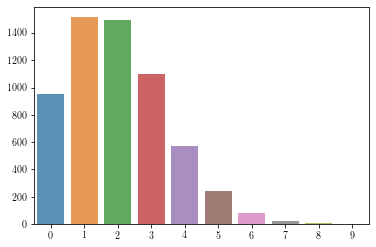

In [24]:
sns.barplot(coll_count.index, coll_count.values, alpha=0.8)

In [29]:
#sns.countplot(df_nr_coll['nrColl'])
#pos_data = stats.poisson.pmf(coll_count.index, df_nr_coll['nrColl'].mean())
#pos_data = pos_data*np.max(coll_count.values)/np.max(pos_data)
#plt.plot(coll_count.index, pos_data, 'go', markersize=10)

The graph above shows the distribution of the collisions. That is how often do we have 0 collisions per time step or 1 collision per time step and so forth. This should probably have a possion distribution and the green dots show a possion distribution fitted to the data. It fits well except for the case with 0 number of collisions per time step. This is likely due to the fact that the system starts empty and we don't have a lot of collisions in the beginning.

# Ion Density

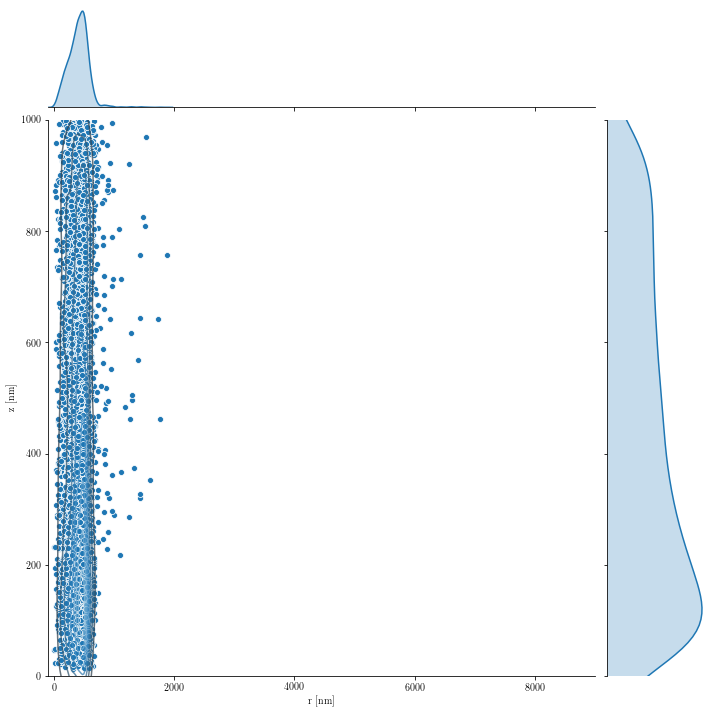

In [21]:
filename_density_ion = './out/density_ion.bin'
dt = np.dtype([('x', np.float64), \
               ('y', np.float64), \
               ('z', np.float64) ])
data_mem = np.memmap(filename_density_ion, dtype=dt, mode='r', order='F')

df_density = pd.DataFrame.from_records(data=data_mem, columns=data_mem.dtype.names)
df_density['r'] = np.sqrt(df_density['x']**2 + df_density['y']**2)

g = sns.JointGrid(x="r", y="z", data=df_density, space=0.125, height=10, xlim=[-100, 9000], ylim=[0, 1000])
g = g.plot_joint(sns.scatterplot)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d", alpha=0.75)
g = g.plot_marginals(sns.kdeplot, shade=True)
g.set_axis_labels('r [nm]', "z [nm]")

# Density at absorber

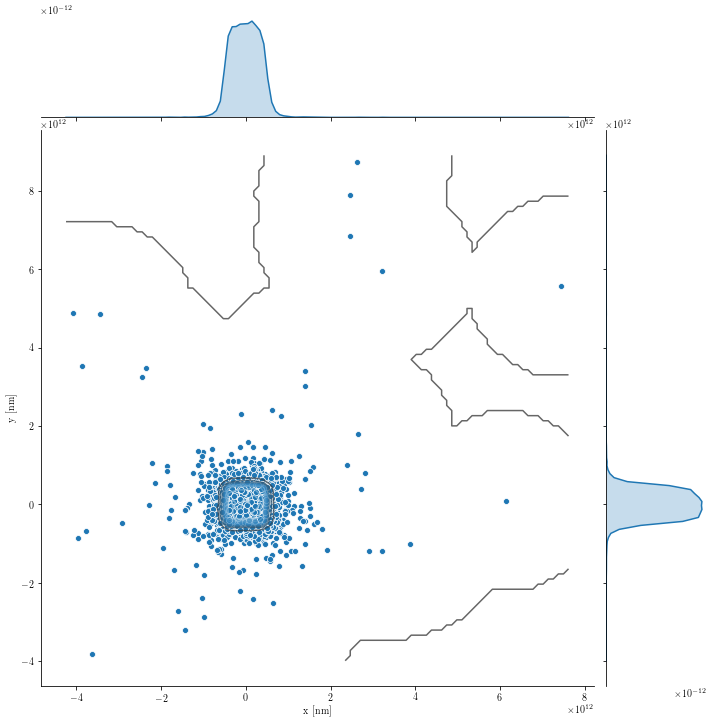

In [22]:
filename_density_top = './out/density_absorb_top.bin'
dt = np.dtype([('x', np.float64), \
               ('y', np.float64), \
               ('v_x', np.float64), \
               ('v_y', np.float64), \
               ('v_z', np.float64), \
               ('emit', np.int32), \
               ('sec', np.int32) ])
data_mem = np.memmap(filename_density_top, dtype=dt, mode='r', order='F')

df_density_top = pd.DataFrame.from_records(data=data_mem, columns=data_mem.dtype.names)
df_density_top['x'] = df_density_top['x'] / 1.0E-9
df_density_top['y'] = df_density_top['y'] / 1.0E-9

g = sns.JointGrid(x="x", y="y", data=df_density_top, space=0.125, height=10)
g = g.plot_joint(sns.scatterplot)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d", alpha=0.75)
g = g.plot_marginals(sns.kdeplot, shade=True)
g.set_axis_labels('x [nm]', "y [nm]")

Graph above shows density at the absorption plane without collisions

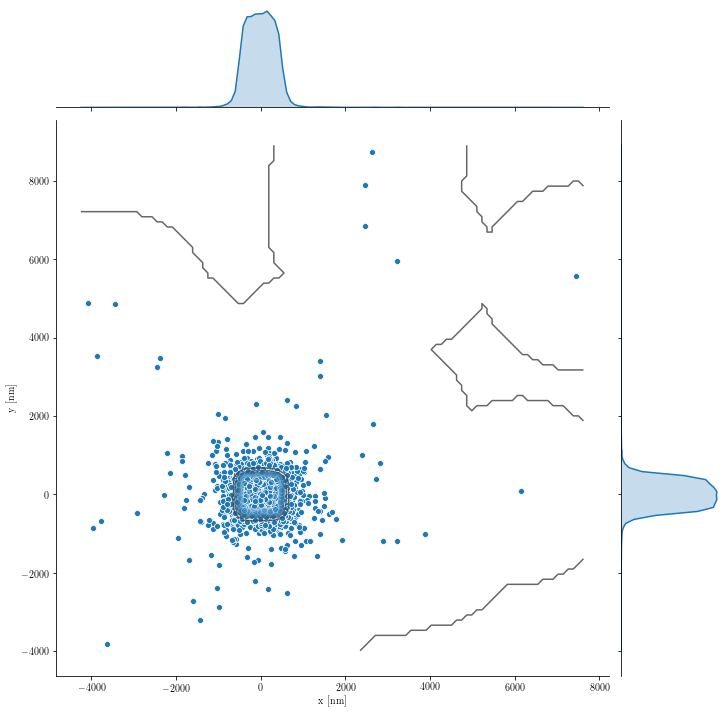

In [23]:
filename_density_top_ion = './out/density_absorb_top.bin'
dt = np.dtype([('x', np.float64), \
               ('y', np.float64), \
               ('v_x', np.float64), \
               ('v_y', np.float64), \
               ('v_z', np.float64), \
               ('emit', np.int32), \
               ('sec', np.int32) ])
data_mem = np.memmap(filename_density_top_ion, dtype=dt, mode='r', order='F')

df_density_top_ion = pd.DataFrame.from_records(data=data_mem, columns=data_mem.dtype.names)

g = sns.JointGrid(x="x", y="y", data=df_density_top_ion, space=0.125, height=10)
g = g.plot_joint(sns.scatterplot)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d", alpha=0.75)
g = g.plot_marginals(sns.kdeplot, shade=True)
g.set_axis_labels('x [nm]', "y [nm]")

Graph above shows density at the absorption plane with Ions